In [12]:
from agents.state import MessageState
from nodes.sql_note import sql_query_node
from nodes.context_node import context_node
from langgraph.graph import StateGraph,START,END

In [ ]:
state = MessageState()
state['question'] = "Lấy tất cả dữ liệu tử bảng olist_customers"
state["SQL_statement"] = "SELECT * from olist.olist_customer oc"

In [30]:
graph = StateGraph(MessageState)

graph.add_node("context_node",context_node)
graph.add_node("sql_query_node", sql_query_node)
graph.add_edge(START, "context_node")
graph.add_edge("context_node", "sql_query_node")
graph.add_edge("sql_query_node", END)
app = graph.compile()

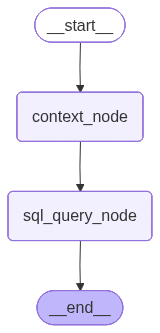

In [31]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
state = app.invoke(state)

In [35]:
state["SQL_data_results"]

[]